In [6]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

reading the dataset

In [12]:
#Loading the Dataset
df=pd.read_csv(r"C:\Users\piyush\ml_proj\heart\heart.csv")
## or
##  df=pd.read_csv("C:/Users/piyush/ml_proj/heart/heart_failure.csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [16]:
# to find the mising values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#firstly find min and max ages
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [18]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


visulaize the age

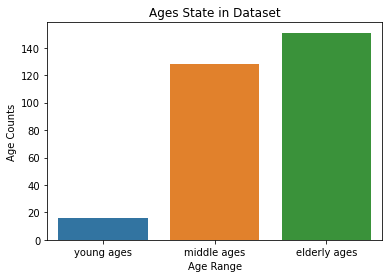

In [19]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

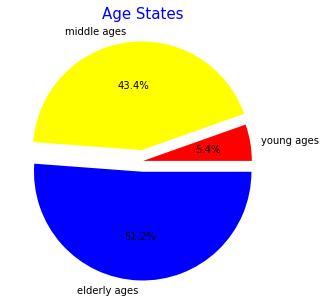

In [20]:
colors = ['red','yellow','blue']
explode = [0,0.1,0.1]
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [21]:
df['AgeRange']=0
youngAge_index=df[(df.age>=29)&(df.age<40)].index
middleAge_index=df[(df.age>=40)&(df.age<55)].index
elderlyAge_index=df[(df.age>55)].index

In [22]:
for index in elderlyAge_index:
    df.loc[index,'AgeRange']=2
for index in middleAge_index:
    df.loc[index,'AgeRange']=1
for index in youngAge_index:
    df.loc[index,'AgeRange']=0

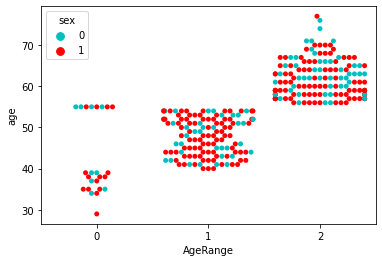

In [23]:
sns.swarmplot(x="AgeRange", y="age",hue='sex',
              palette=["c", "r", "y"], data=df)
plt.show()

No handles with labels found to put in legend.


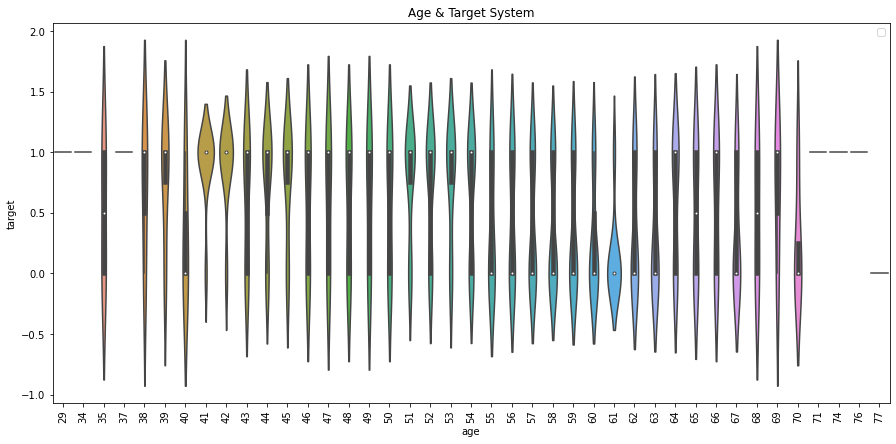

In [24]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.age,y=df.target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

In [25]:
#Percentage calculation of number of patients with or without Heart Disease
NoDisease=len(df[df.target==0])
HaveDisease=len(df[df.target==1])
print("Percentage of patients who does not have Heart Disease:{:.2f}%".format((NoDisease/(len(df.target))*100)))
print("Percentage of patients who have Heart Disease:{:.2f}%".format((HaveDisease/(len(df.target))*100)))

Percentage of patients who does not have Heart Disease:45.54%
Percentage of patients who have Heart Disease:54.46%


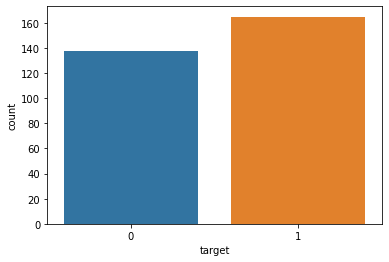

In [26]:
sns.countplot(x="target",data=df)
plt.show()

In [27]:
#Percentage calculation of number of Male and Female patients
No_of_Female=len(df[df.sex==0])
No_of_Male=len(df[df.sex==1])
print("Percentage of Male patients:{:.2f}%".format((No_of_Male/(len(df.sex))*100)))
print("Percentage of Female patients:{:.2f}%".format((No_of_Female/(len(df.sex))*100)))

Percentage of Male patients:68.32%
Percentage of Female patients:31.68%


In [28]:
#Grouping our Data and calculating mean on the basis of target
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AgeRange
target,,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,1.579710
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.284848


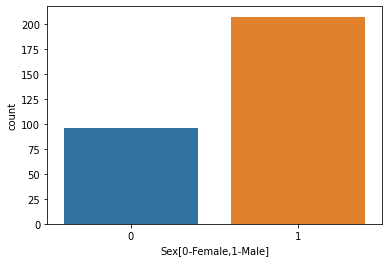

In [29]:
sns.countplot(x='sex',data=df)
plt.xlabel("Sex[0-Female,1-Male]")
plt.show()

(-1.1112411197827725,
 1.1988298537248094,
 -1.1142235747167213,
 1.1576891647739396)

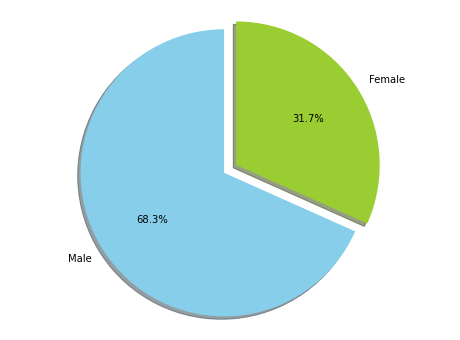

In [30]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])
plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2


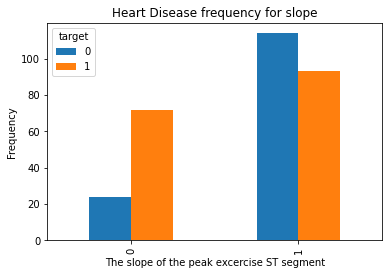

In [32]:
pd.crosstab(df.sex,df.target).plot(kind="bar")
plt.title("Heart Disease frequency for slope")
plt.xlabel('The slope of the peak excercise ST segment')
plt.ylabel("Frequency")
plt.show()

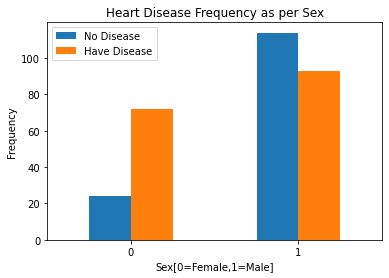

In [33]:
#Representing Heart Disease Frequence as per sex
pd.crosstab(df.sex,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency as per Sex')
plt.xlabel('Sex[0=Female,1=Male]')
plt.xticks(rotation=0)
plt.legend(["No Disease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

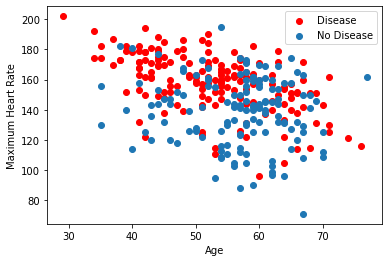

In [34]:
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c="red")
plt.scatter(x=df.age[df.target==0],y=df.thalach[(df.target==0)])
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

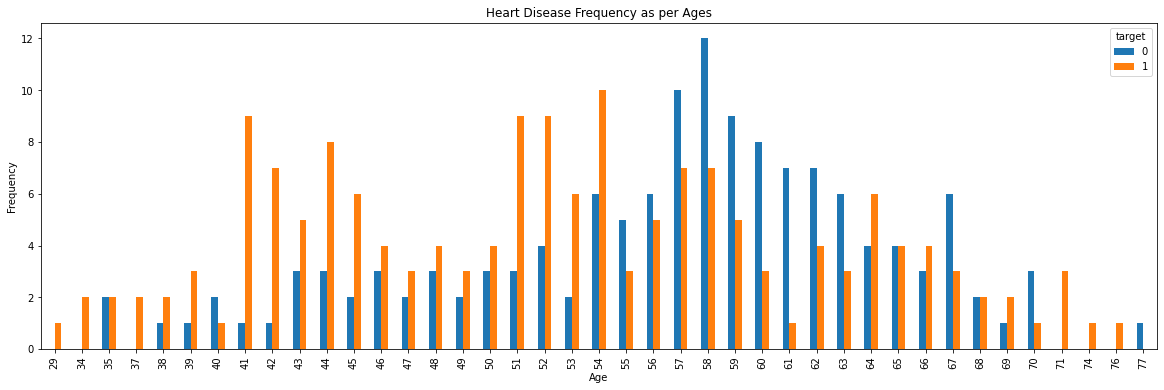

In [35]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency as per Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

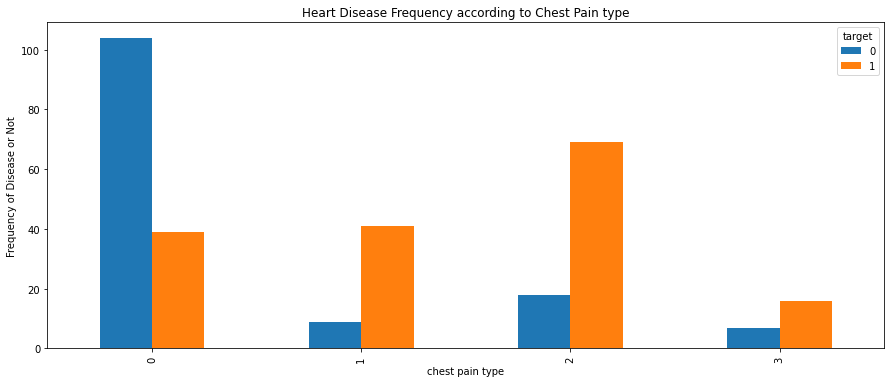

In [36]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title("Heart Disease Frequency according to Chest Pain type")
plt.xlabel("chest pain type")
plt.ylabel("Frequency of Disease or Not")
plt.show()

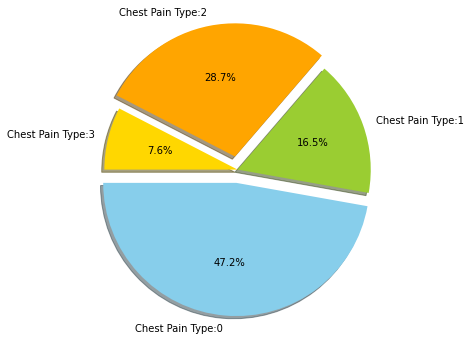

In [37]:
plt.figure(figsize=(8,6))
# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1,0,0.1,0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.show()

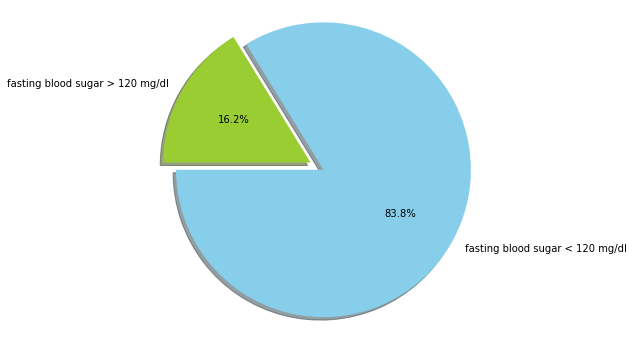

In [38]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
plt.figure(figsize=(8,6))
# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.show()

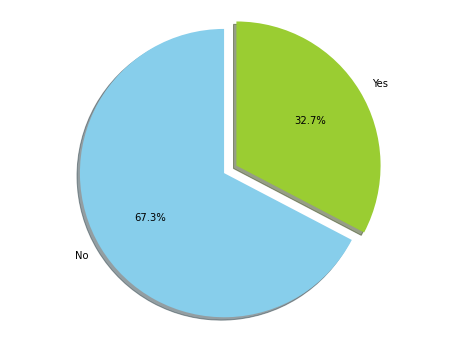

In [39]:
#exang: exercise induced angina (1 = yes; 0 = no)
plt.figure(figsize=(8,6))
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [40]:
x=df.iloc[:,0:13]

In [41]:
y=df.iloc[:,-1:]

In [42]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [43]:
y.head()

,AgeRange
0,2
1,0
2,1
3,2
4,2


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [45]:
#Applying Logistic Regression to our Dataset
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 74.73%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
#Applying KNN Classification Algorithm to our Dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6153846153846154


<ipython-input-46-86ed89b0d5f8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)


In [47]:
#Applying Decision Tree Algorithm to our Dataset
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=.1)
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 100.00%


In [48]:
#Applying Random Forest Algorithm to our Dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

<ipython-input-48-f95e11ee2923>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Random Forest Algorithm Accuracy Score : 96.70%


In [49]:
#Applying SVM Algorithm to our Dataset
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test,y_test)*100))

Test Accuracy of SVM Algorithm: 80.22%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [50]:
#Applying Gaussian Naive Bayes Algorithm to our Dataset
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 39.56%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


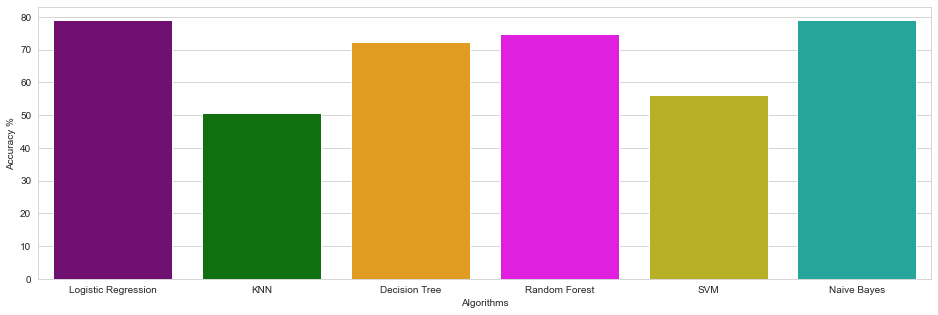

In [51]:
#Comparing Different Models applied to our Dtaset
methods = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive Bayes"]
accuracy = [79.12, 50.54, 72.53, 74.73, 56.04, 79.12]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

In [52]:
y_head_lr = lr.predict(x_test)
y_head_knn = knn.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

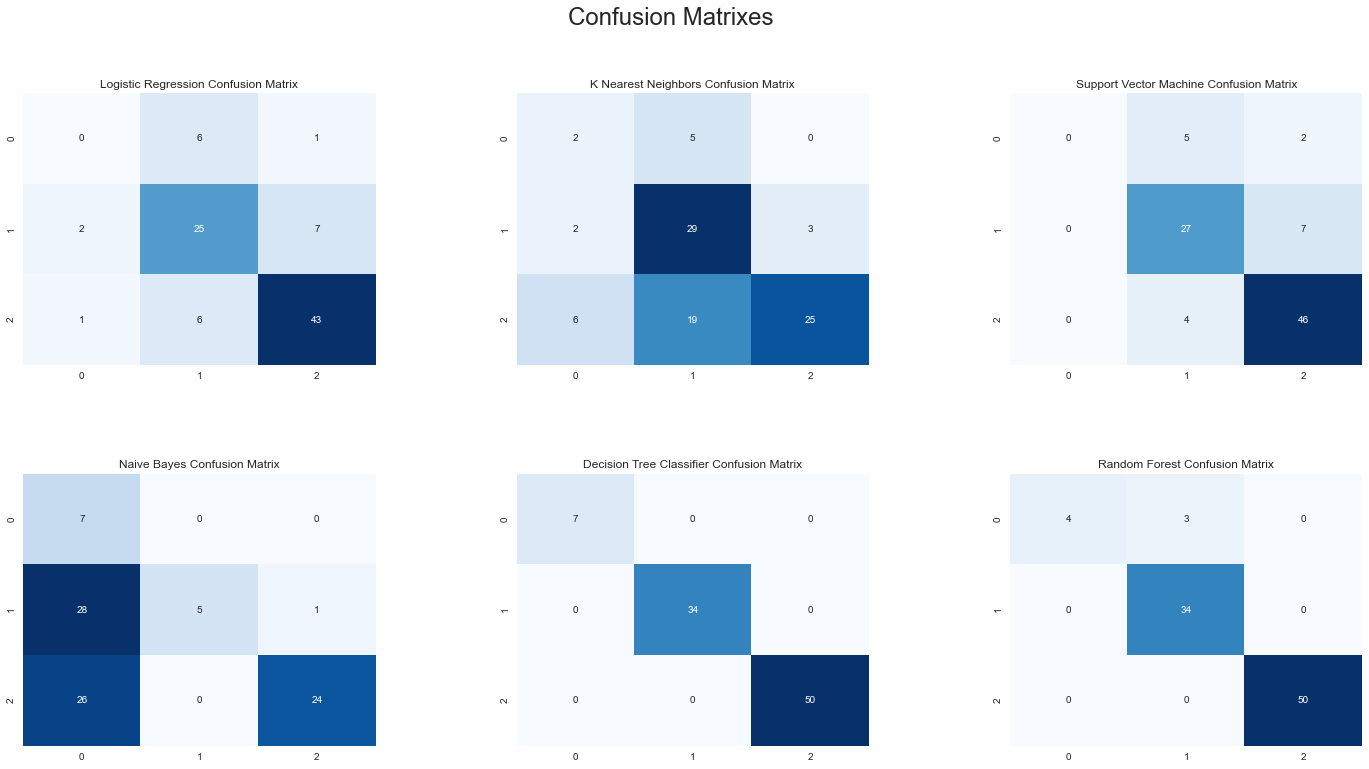

In [54]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

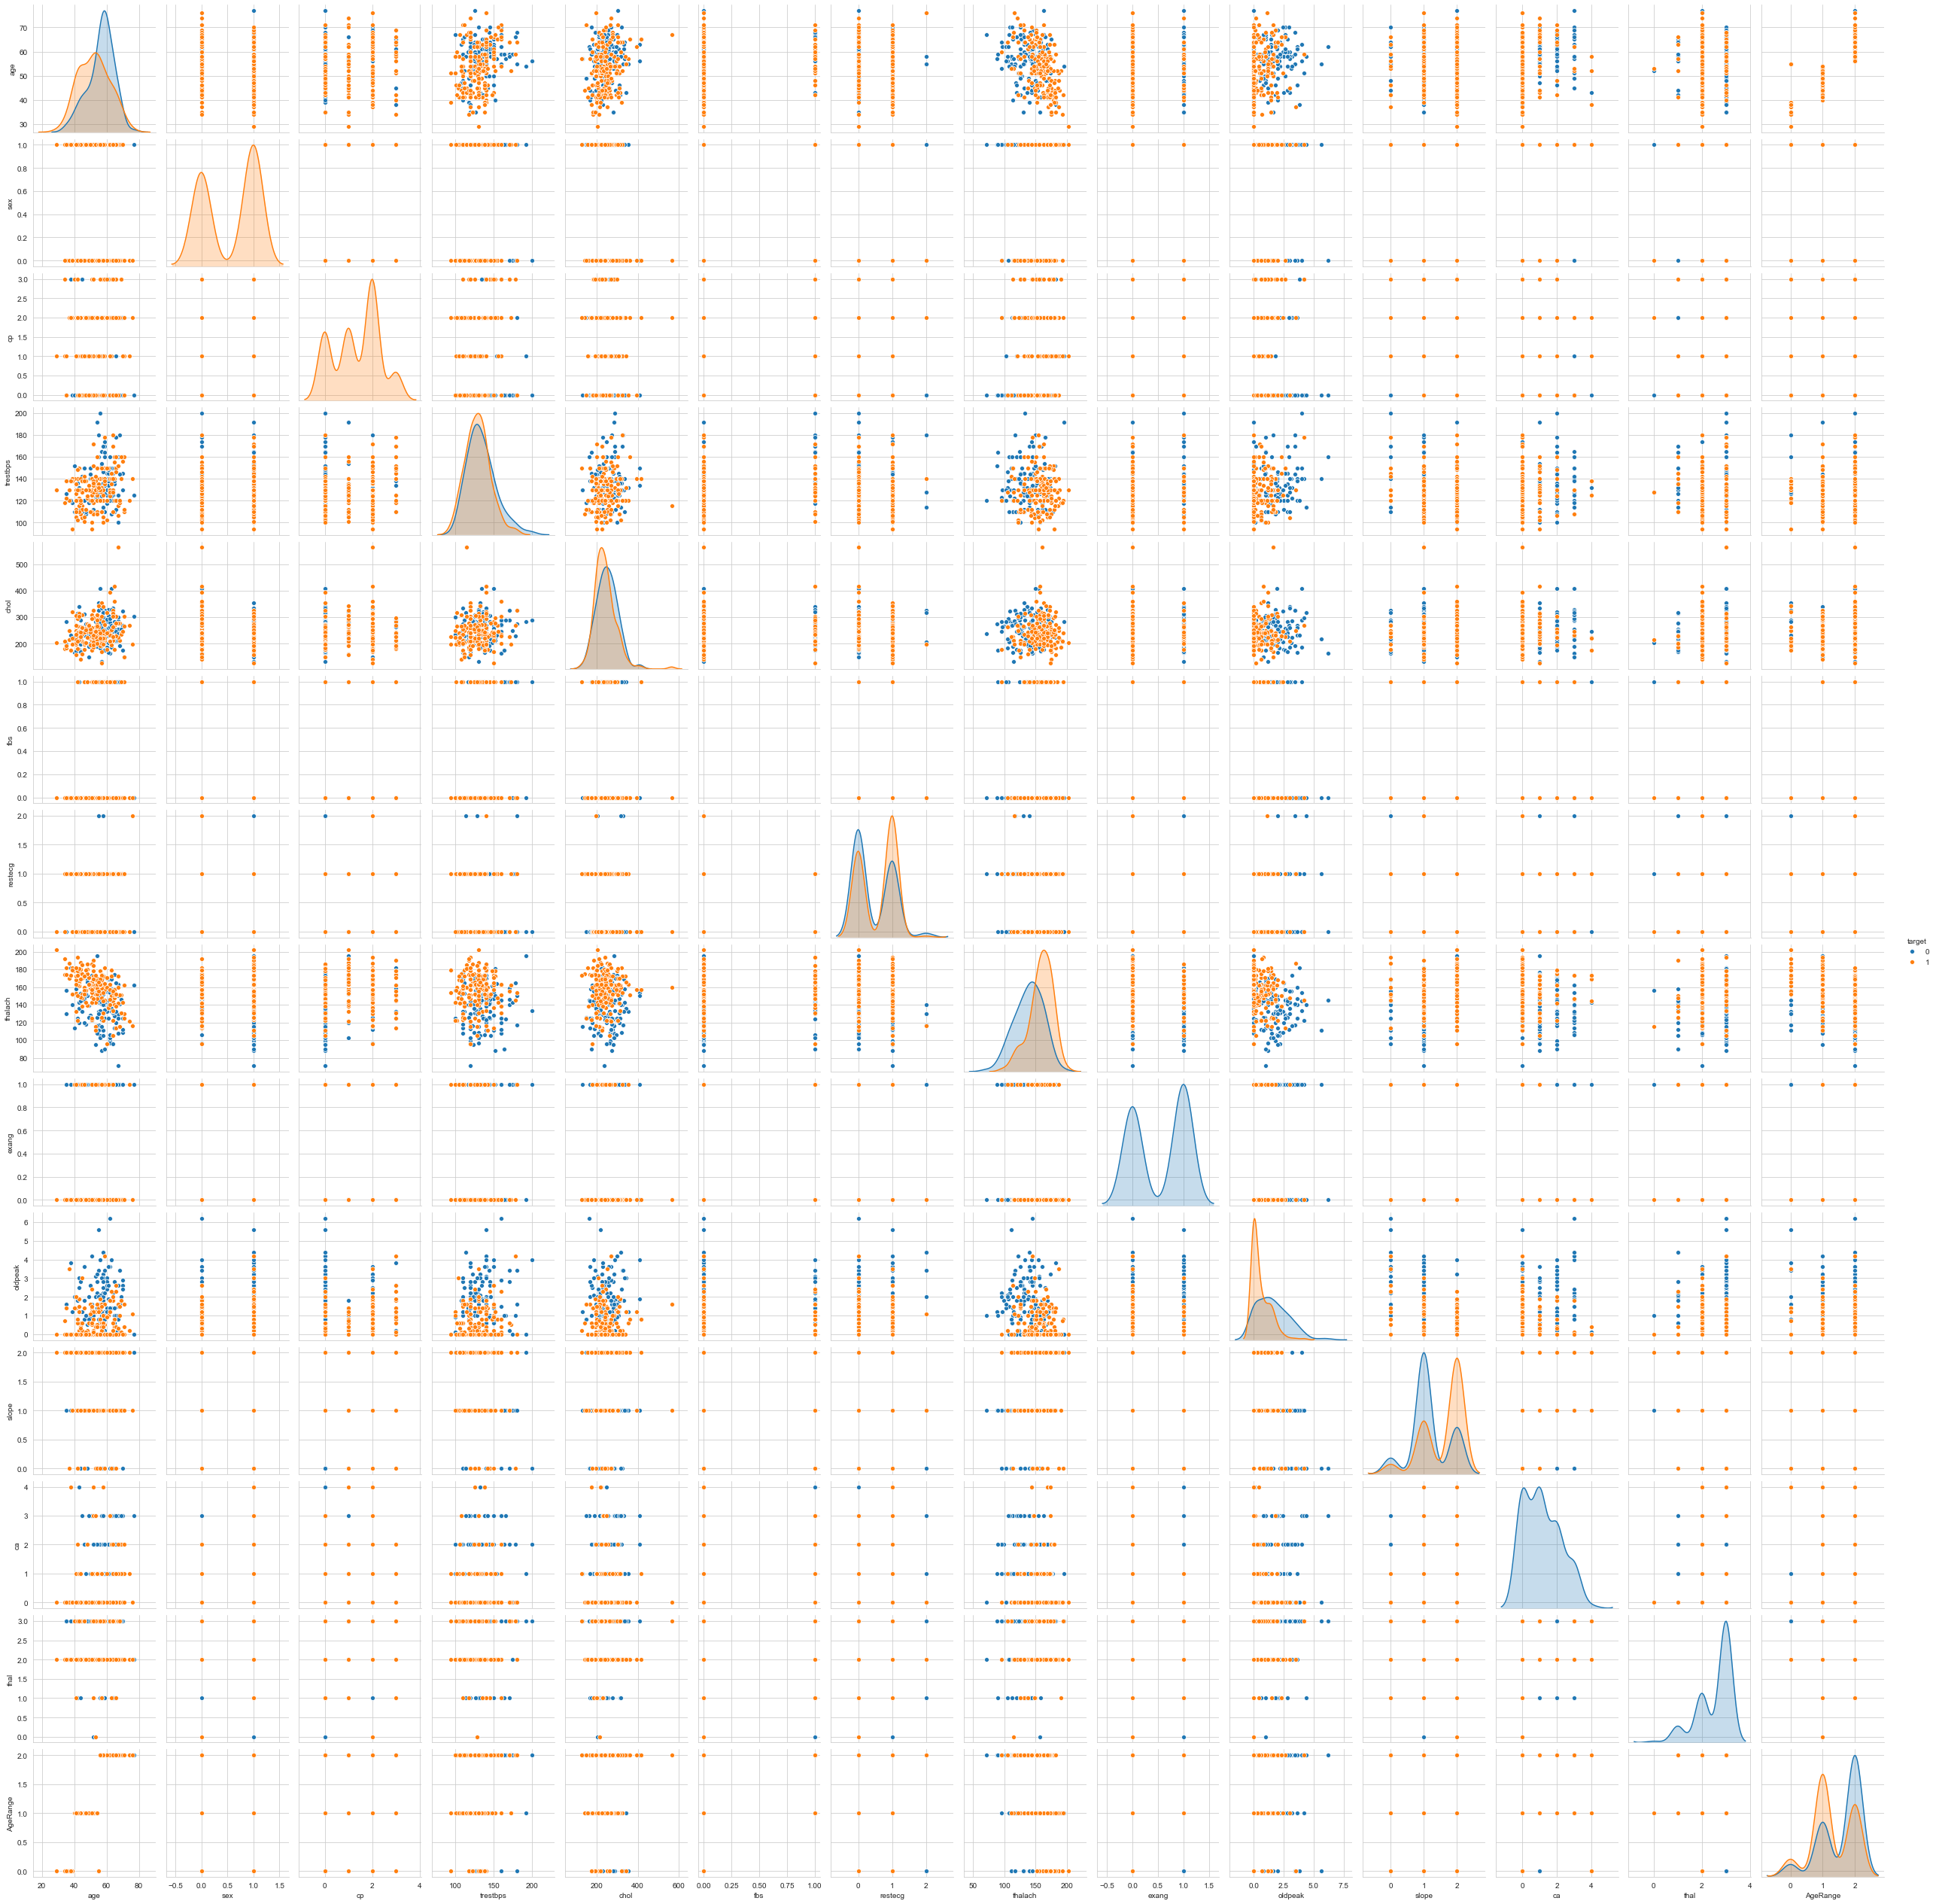

In [55]:
sns.pairplot(df,hue="target")
plt.show()

In [56]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(heart_pred, file)

NameError: name 'heart_pred' is not defined